In [13]:
print("hello world")

hello world


In [14]:
import pandas as pd
import numpy as np

data = pd.read_csv(r'NSL_Regular_Season_Data.csv')
data = data[data["n"] == data["n"]].iloc[:,:17]

data_home = data.sort_values(by="HomeTeam",ascending=True)
data_away = data.sort_values(by="AwayTeam",ascending=True)

data

,n,game_id,HomeTeam,AwayTeam,HomeScore,AwayScore,Home_xG,Away_xG,Home_shots,Away_shots,Home_corner,Away_corner,Home_PK_Goal,Away_PK_Goal,Home_PK_shots,Away_PK_shots,Home_ToP
0,1.0,game_2023_1,PRO,MAN,1.0,1.0,1.63,0.34,17.0,8.0,5.0,4.0,0.0,0.0,0.0,0.0,0.53
1,2.0,game_2023_2,FOR,LEX,1.0,0.0,0.98,0.90,9.0,11.0,5.0,2.0,0.0,0.0,0.0,0.0,0.57
2,3.0,game_2023_3,SJU,DES,1.0,2.0,1.23,1.11,16.0,9.0,6.0,7.0,0.0,0.0,0.0,0.0,0.47
3,4.0,game_2023_4,FAR,ANC,0.0,1.0,2.27,1.08,4.0,14.0,8.0,3.0,0.0,0.0,0.0,0.0,0.51
4,5.0,game_2023_5,DOV,BAK,0.0,0.0,1.90,0.56,17.0,6.0,5.0,3.0,0.0,0.0,0.0,0.0,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,472.0,game_2023_472,SAS,TAC,1.0,2.0,0.71,0.51,19.0,12.0,7.0,7.0,0.0,0.0,0.0,0.0,0.42
472,473.0,game_2023_473,DOV,MOB,1.0,1.0,1.70,0.14,19.0,10.0,1.0,5.0,0.0,0.0,0.0,0.0,0.51
473,474.0,game_2023_474,BAK,EUG,3.0,2.0,2.68,1.43,17.0,18.0,9.0,6.0,1.0,0.0,2.0,1.0,0.49
474,475.0,game_2023_475,LRO,LEX,1.0,2.0,2.10,1.30,17.0,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.51


In [15]:
teams = data.sort_values(by="HomeTeam",ascending=True).HomeTeam.unique()
teams

array(['ALB', 'ANC', 'AUG', 'BAK', 'BOI', 'CHM', 'DES', 'DOV', 'EUG',
       'FAR', 'FOR', 'JAC', 'LAR', 'LEX', 'LRO', 'MAN', 'MOB', 'OAK',
       'PRO', 'REN', 'SAS', 'SFS', 'SJU', 'SPR', 'TAC', 'TOL', 'TUC',
       'WIC'], dtype=object)

In [16]:
avg_when_home = pd.DataFrame(index=range(len(teams)),columns=list(data.columns[2:3])+list(data.select_dtypes(include=np.number).columns[1:]))
for i in range(len(avg_when_home)):
    avg_when_home.iloc[i].iloc[:1] = teams[i]
    avg_when_home.iloc[i].iloc[1:] = data_home[data_home["HomeTeam"]==teams[i]].select_dtypes(include=np.number).mean()[1:]

new_columns = list(avg_when_home.columns)
for i in range(len(new_columns)):
    new_columns[i]=new_columns[i].replace("Away","Opp")
    new_columns[i]=new_columns[i].replace("Home","Team")
    new_columns[i]=new_columns[i].replace("TeamTeam","Team")
avg_when_home = avg_when_home.rename(columns=dict(zip(avg_when_home.columns,new_columns)))
avg_when_home

,Team,TeamScore,OppScore,Team_xG,Opp_xG,Team_shots,Opp_shots,Team_corner,Opp_corner,Team_PK_Goal,Opp_PK_Goal,Team_PK_shots,Opp_PK_shots,Team_ToP
0,ALB,1.470588,1.823529,1.225882,1.215294,12.352941,12.058824,5.470588,2.941176,0.0,0.0,0.235294,0.176471,0.497647
1,ANC,1.411765,0.941176,2.084118,0.818824,17.882353,10.470588,5.352941,4.529412,0.0,0.0,0.235294,0.117647,0.48
2,AUG,2.117647,1.411765,1.881176,0.923529,15.529412,9.705882,5.588235,4.058824,0.117647,0.0,0.294118,0.235294,0.577647
3,BAK,1.411765,1.352941,1.565882,0.996471,16.705882,12.411765,6.294118,4.529412,0.058824,0.0,0.176471,0.058824,0.476471
4,BOI,1.235294,1.176471,1.854118,0.752941,16.705882,10.882353,6.352941,4.882353,0.058824,0.0,0.294118,0.0,0.505294
5,CHM,0.882353,1.117647,1.485882,1.167059,16.529412,10.764706,4.882353,4.294118,0.0,0.0,0.352941,0.176471,0.537059
6,DES,1.647059,1.882353,1.225882,0.955882,12.352941,9.294118,5.235294,4.882353,0.058824,0.0,0.117647,0.117647,0.550588
7,DOV,1.941176,1.352941,1.835294,0.791176,17.058824,8.647059,5.058824,5.176471,0.0,0.117647,0.235294,0.117647,0.469412
8,EUG,1.294118,1.588235,1.252353,1.202353,14.823529,11.294118,5.882353,4.470588,0.0,0.0,0.235294,0.058824,0.432353
9,FAR,2.058824,1.411765,2.027647,0.919412,14.764706,10.352941,7.294118,4.294118,0.0,0.0,0.176471,0.117647,0.55


In [17]:
avg_when_away = pd.DataFrame(index=range(len(teams)),columns=list(data.columns[3:4])+list(data.select_dtypes(include=np.number).columns[1:]))
for i in range(len(avg_when_home)):
    avg_when_away.iloc[i].iloc[:1] = teams[i]
    avg_when_away.iloc[i].iloc[1:] = data_away[data_away["AwayTeam"]==teams[i]].select_dtypes(include=np.number).mean()[1:]

new_columns = list(avg_when_away.columns)
for i in range(len(new_columns)):
    new_columns[i]=new_columns[i].replace("Away","Team")
    new_columns[i]=new_columns[i].replace("Home","Opp")
    new_columns[i]=new_columns[i].replace("TeamTeam","Team")
avg_when_away = avg_when_away.rename(columns=dict(zip(avg_when_away.columns,new_columns)))
avg_when_away

,Team,OppScore,TeamScore,Opp_xG,Team_xG,Opp_shots,Team_shots,Opp_corner,Team_corner,Opp_PK_Goal,Team_PK_Goal,Opp_PK_shots,Team_PK_shots,Opp_ToP
0,ALB,2.117647,1.764706,1.57,1.283529,15.470588,12.882353,4.117647,4.352941,0.0,0.0,0.411765,0.0,0.543529
1,ANC,1.588235,2.117647,1.522941,1.014118,12.764706,12.0,5.529412,3.882353,0.117647,0.0,0.235294,0.058824,0.514118
2,AUG,1.352941,1.529412,1.552353,1.084706,12.117647,11.705882,4.764706,4.470588,0.0,0.058824,0.058824,0.294118,0.469412
3,BAK,1.647059,1.352941,1.642941,0.921176,16.235294,10.0,6.117647,4.411765,0.058824,0.0,0.176471,0.117647,0.56
4,BOI,1.882353,1.823529,1.573529,1.125294,15.352941,11.764706,7.117647,3.470588,0.0,0.0,0.235294,0.176471,0.548824
5,CHM,1.294118,1.470588,1.597059,0.911176,16.058824,10.764706,5.529412,4.882353,0.0,0.058824,0.176471,0.176471,0.496471
6,DES,1.176471,1.647059,1.405882,1.056471,15.294118,11.352941,5.764706,4.117647,0.0,0.058824,0.235294,0.176471,0.488235
7,DOV,2.176471,1.705882,1.335294,1.110588,12.882353,13.470588,5.647059,4.117647,0.058824,0.058824,0.235294,0.117647,0.575294
8,EUG,1.647059,1.470588,1.774118,0.872353,15.352941,10.0,5.647059,4.294118,0.176471,0.0,0.470588,0.058824,0.574706
9,FAR,1.294118,1.941176,1.311176,1.147059,14.235294,11.470588,5.176471,3.588235,0.0,0.058824,0.529412,0.117647,0.514118


In [18]:
averages=avg_when_home.merge(avg_when_away,on="Team",how='outer',suffixes=("_Home","_Away"))
averages

,Team,TeamScore_Home,OppScore_Home,Team_xG_Home,Opp_xG_Home,Team_shots_Home,Opp_shots_Home,Team_corner_Home,Opp_corner_Home,Team_PK_Goal_Home,...,Team_xG_Away,Opp_shots_Away,Team_shots_Away,Opp_corner_Away,Team_corner_Away,Opp_PK_Goal_Away,Team_PK_Goal_Away,Opp_PK_shots_Away,Team_PK_shots_Away,Opp_ToP
0,ALB,1.470588,1.823529,1.225882,1.215294,12.352941,12.058824,5.470588,2.941176,0.0,...,1.283529,15.470588,12.882353,4.117647,4.352941,0.0,0.0,0.411765,0.0,0.543529
1,ANC,1.411765,0.941176,2.084118,0.818824,17.882353,10.470588,5.352941,4.529412,0.0,...,1.014118,12.764706,12.0,5.529412,3.882353,0.117647,0.0,0.235294,0.058824,0.514118
2,AUG,2.117647,1.411765,1.881176,0.923529,15.529412,9.705882,5.588235,4.058824,0.117647,...,1.084706,12.117647,11.705882,4.764706,4.470588,0.0,0.058824,0.058824,0.294118,0.469412
3,BAK,1.411765,1.352941,1.565882,0.996471,16.705882,12.411765,6.294118,4.529412,0.058824,...,0.921176,16.235294,10.0,6.117647,4.411765,0.058824,0.0,0.176471,0.117647,0.56
4,BOI,1.235294,1.176471,1.854118,0.752941,16.705882,10.882353,6.352941,4.882353,0.058824,...,1.125294,15.352941,11.764706,7.117647,3.470588,0.0,0.0,0.235294,0.176471,0.548824
5,CHM,0.882353,1.117647,1.485882,1.167059,16.529412,10.764706,4.882353,4.294118,0.0,...,0.911176,16.058824,10.764706,5.529412,4.882353,0.0,0.058824,0.176471,0.176471,0.496471
6,DES,1.647059,1.882353,1.225882,0.955882,12.352941,9.294118,5.235294,4.882353,0.058824,...,1.056471,15.294118,11.352941,5.764706,4.117647,0.0,0.058824,0.235294,0.176471,0.488235
7,DOV,1.941176,1.352941,1.835294,0.791176,17.058824,8.647059,5.058824,5.176471,0.0,...,1.110588,12.882353,13.470588,5.647059,4.117647,0.058824,0.058824,0.235294,0.117647,0.575294
8,EUG,1.294118,1.588235,1.252353,1.202353,14.823529,11.294118,5.882353,4.470588,0.0,...,0.872353,15.352941,10.0,5.647059,4.294118,0.176471,0.0,0.470588,0.058824,0.574706
9,FAR,2.058824,1.411765,2.027647,0.919412,14.764706,10.352941,7.294118,4.294118,0.0,...,1.147059,14.235294,11.470588,5.176471,3.588235,0.0,0.058824,0.529412,0.117647,0.514118


In [19]:
averages.to_csv("team_statistics_averages.csv")

<AxesSubplot:xlabel='TeamScore_Home', ylabel='TeamScore_Away'>

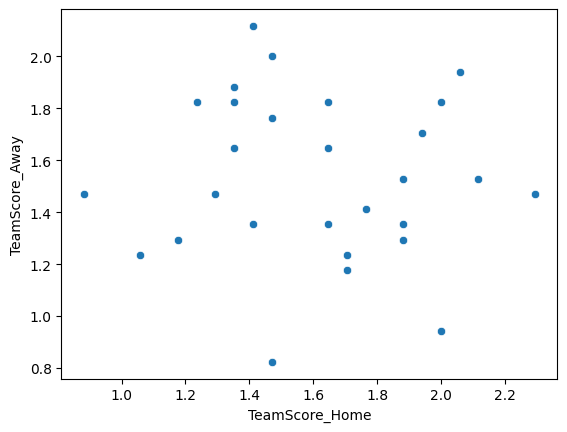

In [20]:
import seaborn as sns

sns.scatterplot(x=averages.TeamScore_Home,y=averages.TeamScore_Away)

In [35]:
corr=averages.set_index('Team').corr(method='pearson')

In [41]:
corr

,TeamScore_Home,OppScore_Home,Team_xG_Home,Opp_xG_Home,Team_shots_Home,Opp_shots_Home,Team_corner_Home,Opp_corner_Home,Team_PK_Goal_Home,Opp_PK_Goal_Home,...,Team_xG_Away,Opp_shots_Away,Team_shots_Away,Opp_corner_Away,Team_corner_Away,Opp_PK_Goal_Away,Team_PK_Goal_Away,Opp_PK_shots_Away,Team_PK_shots_Away,Opp_ToP
TeamScore_Home,1.000000,0.274444,0.229137,-0.201368,0.015299,0.054982,0.139870,0.032565,0.027879,0.015130,...,0.021429,-0.365567,0.169464,-0.200468,-0.328529,0.034692,0.178415,2.067762e-01,0.081352,0.215524
OppScore_Home,0.274444,1.000000,-0.385651,0.549586,-0.664043,0.413171,-0.295460,-0.097208,0.024250,0.003923,...,-0.449160,0.072013,-0.273014,0.025004,0.224344,0.111675,0.053444,3.067459e-01,-0.196655,0.045577
Team_xG_Home,0.229137,-0.385651,1.000000,-0.454752,0.505303,-0.321572,0.331668,0.090198,-0.063281,0.078074,...,0.284028,-0.388599,0.143135,0.048805,-0.244650,-0.177310,0.082035,-1.744337e-01,0.121635,-0.321422
Opp_xG_Home,-0.201368,0.549586,-0.454752,1.000000,-0.463096,0.456634,-0.364218,-0.154305,-0.318670,-0.198020,...,-0.443217,0.332628,-0.343813,-0.066527,0.461083,0.294745,-0.084752,1.983019e-01,-0.217385,-0.097415
Team_shots_Home,0.015299,-0.664043,0.505303,-0.463096,1.000000,-0.075698,0.290249,0.260770,-0.082307,0.191753,...,0.113088,-0.214735,0.138979,0.291985,-0.192184,0.069340,-0.047755,-2.902741e-01,0.159919,0.109588
Opp_shots_Home,0.054982,0.413171,-0.321572,0.456634,-0.075698,1.000000,-0.039077,-0.206033,-0.033049,-0.069362,...,-0.365607,0.389299,-0.441412,0.230053,0.188752,0.324705,-0.291876,3.243437e-01,-0.186215,0.261613
Team_corner_Home,0.139870,-0.295460,0.331668,-0.364218,0.290249,-0.039077,1.000000,0.256153,-0.107334,-0.050126,...,0.337441,-0.050612,0.087736,0.037598,-0.350265,-0.419569,-0.050010,1.796443e-01,0.024579,0.209295
Opp_corner_Home,0.032565,-0.097208,0.090198,-0.154305,0.260770,-0.206033,0.256153,1.000000,-0.215423,0.221538,...,-0.166498,0.066686,0.025768,0.254852,-0.282488,-0.058033,-0.092792,-1.337318e-01,0.121778,0.251002
Team_PK_Goal_Home,0.027879,0.024250,-0.063281,-0.318670,-0.082307,-0.033049,-0.107334,-0.215423,1.000000,0.133473,...,-0.136525,-0.237796,-0.399307,-0.006520,0.226483,-0.237647,0.054193,-3.425801e-01,0.377912,-0.105578
Opp_PK_Goal_Home,0.015130,0.003923,0.078074,-0.198020,0.191753,-0.069362,-0.050126,0.221538,0.133473,1.000000,...,-0.086350,-0.102842,0.050542,0.199947,0.152008,-0.092275,-0.098636,-1.534833e-02,-0.001720,0.153609


<AxesSubplot:>

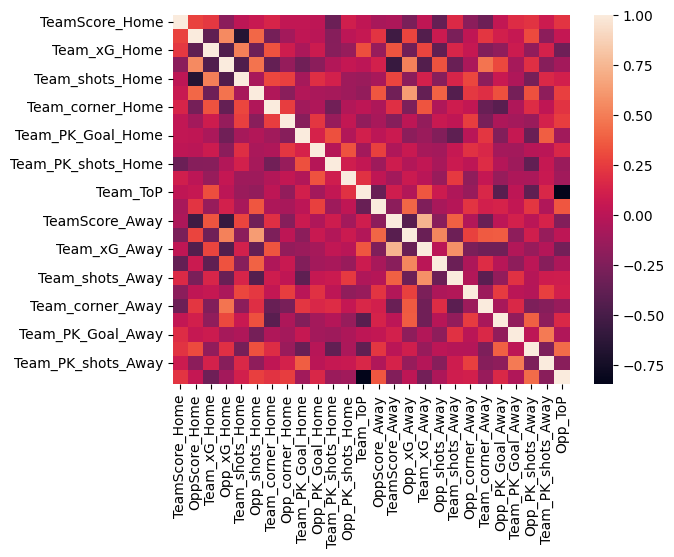

In [39]:
sns.heatmap(corr)

In [ ]:
chess ratings system, randomize order of games
create a chart for who beat who during the games